In [ ]:

#from google.colab import drive
#drive.mount('/content/gdrive')
#from google.colab import drive
#drive.mount('/content/drive')
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
#%cd /content/gdrive/My Drive/Kaggle

In [4]:
import numpy as np 
import pandas as pd

In [5]:
news = pd.read_csv('https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv')

In [6]:
news.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:xlabel='category', ylabel='count'>

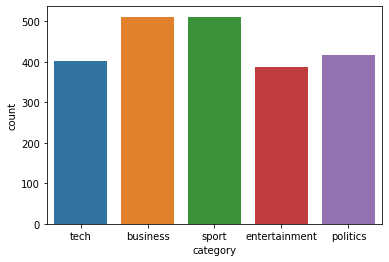

In [10]:
sns.countplot(news['category'])

In [12]:
import string
import nltk
from nltk.corpus import stopwords
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
news['title_wo_punct']=news['text'].apply(lambda x: remove_punctuation(x))
news.head()

,category,text,title_wo_punct
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...


In [14]:
import re
def tokenize(text):
    split=re.split("\W+",text) 
    return split
news['title_wo_punct_split']=news['title_wo_punct'].apply(lambda x: tokenize(x.lower()))
news.head()

,category,text,title_wo_punct,title_wo_punct_split
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with..."
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w..."
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,..."
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ..."


In [15]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import nltk
from nltk.corpus import stopwords
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:11])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\adesh\AppData\Roaming\nltk_data...
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [16]:
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
news['title_wo_punct_split_wo_stopwords'] = news['title_wo_punct_split'].apply(lambda x: remove_stopwords(x))
news.head()

,category,text,title_wo_punct,title_wo_punct_split,title_wo_punct_split_wo_stopwords
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with...","[tv, future, hands, viewers, home, theatre, sy..."
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, books, alone, former, w..."
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,...","[tigers, wary, farrell, gamble, leicester, say..."
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie...","[yeading, face, newcastle, fa, cup, premiershi..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ...","[ocean, twelve, raids, box, office, ocean, twe..."


In [17]:
def text_data_cleaning(sentence):
    ip1=remove_punctuation(sentence)
    ip2=tokenize(ip1)
    ip3=remove_stopwords(ip2)
    return ip3

In [18]:
text_data_cleaning("  tis is the best in the Himansuh")

['', 'tis', 'best', 'Himansuh']

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=text_data_cleaning)

In [21]:
X = news['text']
y = news['category']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [23]:
X_train.shape, y_train.shape

((1780,), (1780,))

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=1)
clf = Pipeline([('tfidf',tfidf),('clf',classifier)])
clf.fit(X_train,y_train)
z=accuracy_score(y_test,clf.predict(X_test))
print("Accuracy= ",z)
print(classification_report(y_test,clf.predict(X_test)))

Accuracy=  0.9573033707865168
               precision    recall  f1-score   support

     business       0.93      0.96      0.95       102
entertainment       0.97      0.94      0.95        78
     politics       0.96      0.95      0.95        78
        sport       0.96      1.00      0.98       108
         tech       0.96      0.92      0.94        79

     accuracy                           0.96       445
    macro avg       0.96      0.95      0.96       445
 weighted avg       0.96      0.96      0.96       445



In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
clf = Pipeline([('tfidf',tfidf),('clf',classifier)])
clf.fit(X_train,y_train)
z=accuracy_score(y_test,clf.predict(X_test))
print("Accuracy= ",z)
print(classification_report(y_test,clf.predict(X_test)))

Accuracy=  0.9258426966292135
               precision    recall  f1-score   support

     business       0.95      0.87      0.91       102
entertainment       0.94      0.87      0.91        78
     politics       0.84      0.95      0.89        78
        sport       0.97      0.96      0.97       108
         tech       0.92      0.97      0.94        79

     accuracy                           0.93       445
    macro avg       0.92      0.93      0.92       445
 weighted avg       0.93      0.93      0.93       445



In [27]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
clf = Pipeline([('tfidf',tfidf),('clf',classifier)])
clf.fit(X_train,y_train)
z=accuracy_score(y_test,clf.predict(X_test))
print("Accuracy= ",z)
print(classification_report(y_test,clf.predict(X_test)))

Accuracy=  0.9797752808988764
               precision    recall  f1-score   support

     business       0.97      0.98      0.98       102
entertainment       0.99      0.92      0.95        78
     politics       0.95      1.00      0.97        78
        sport       1.00      1.00      1.00       108
         tech       0.99      0.99      0.99        79

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



In [28]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
clf = Pipeline([('tfidf',tfidf),('clf',classifier)])
clf.fit(X_train,y_train)
z=accuracy_score(y_test,clf.predict(X_test))
print("Accuracy= ",z)
print(classification_report(y_test,clf.predict(X_test)))

Accuracy=  0.9955056179775281
               precision    recall  f1-score   support

     business       1.00      0.99      1.00       102
entertainment       0.99      1.00      0.99        78
     politics       0.99      1.00      0.99        78
        sport       1.00      1.00      1.00       108
         tech       1.00      0.99      0.99        79

     accuracy                           1.00       445
    macro avg       0.99      1.00      1.00       445
 weighted avg       1.00      1.00      1.00       445



In [29]:
text = '''
The proposed four-storied building would sprawl over an area of 64,500 sq meters 
and cost an estimated ₹ 971 crore.'''

pred = clf.predict([text])
print(pred)

['business']
